# Supervised Classification: Decision Trees 

## Import Libraries 

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import sklearn.metrics as metrics
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


## Read the dataset

In this case the training dataset is just a csv file. In case of larger dataset more advanced file fromats like hdf5 are used.

Pandas is used to load the files. 

In [13]:
Data=pd.read_csv ('DataExample.csv')



# if you need to print or have access to the data as numpy array you can execute the following commands 

# print (Data)
# print(Data.as_matrix(columns=['NAWMpost']))



## Creating training sets

Each class of tissue in our pandas framework has a pre assigned label (Module 1).

This labels were: 
- ClassTissuePost
- ClassTissuePre
- ClassTissueFlair
- ClassTumorPost
- ClassTumorPre
- ClassTumorFlair
- ClassEdemaPost
- ClassEdemaPre
- ClassEdemaFlair

For demonstration purposes we will create a feature vector that contains the intensities for the tumor and brain tissue are from the T1w pre and post contrast images. 

In [14]:
ClassBrainTissuepost=(Data['ClassTissuePost'].values)
ClassBrainTissuepost= (np.asarray(ClassBrainTissuepost))
ClassBrainTissuepost=ClassBrainTissuepost[~np.isnan(ClassBrainTissuepost)]
ClassBrainTissuepre=(Data[['ClassTissuePre']].values)
ClassBrainTissuepre= (np.asarray(ClassBrainTissuepre))
ClassBrainTissuepre=ClassBrainTissuepre[~np.isnan(ClassBrainTissuepre)]
ClassTUMORpost=(Data[['ClassTumorPost']].values)
ClassTUMORpost= (np.asarray(ClassTUMORpost))
ClassTUMORpost=ClassTUMORpost[~np.isnan(ClassTUMORpost)]
ClassTUMORpre=(Data[['ClassTumorPre']].values)
ClassTUMORpre= (np.asarray(ClassTUMORpre))
ClassTUMORpre=ClassTUMORpre[~np.isnan(ClassTUMORpre)]
X_1 = np.stack((ClassBrainTissuepost,ClassBrainTissuepre)) # we only take the first two features.
X_2 = np.stack((ClassTUMORpost,ClassTUMORpre))
X=np.concatenate((X_1.transpose(), X_2.transpose()),axis=0)
y =np.zeros((np.shape(X))[0])
y[np.shape(X_1)[1]:]=1

**X** is the feature vector

**y** are the labels

## Split Training/Validation 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Create the classifier

For the following example we will consider a Decision tree classifier. 

The classifier is provided by the Scikit-Learn library

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Print a summary of our model 
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


## Run some basic analytics


Calculate some basic metrics. 

In [17]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.91      0.86      0.88       200
        1.0       0.87      0.91      0.89       200

avg / total       0.89      0.89      0.89       400

[[173  27]
 [ 18 182]]


## Correct way

### Fine tune hyperparameters

In [18]:
max_leaf_nodes_eval =[2,3,4,9]
classifier = GridSearchCV(estimator=model, cv=5, param_grid=dict(max_leaf_nodes=max_leaf_nodes_eval))
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### Debug algorithm with learning curve

X_train is randomly split into a training and a test set 3 times (n_iter=3). Each point on the training-score curve is the average of 3 scores where the model was trained and evaluated on the first i training examples. Each point on the cross-validation score curve is the average of 3 scores where the model was trained on the first i training examples and evaluated on all examples of the test set.



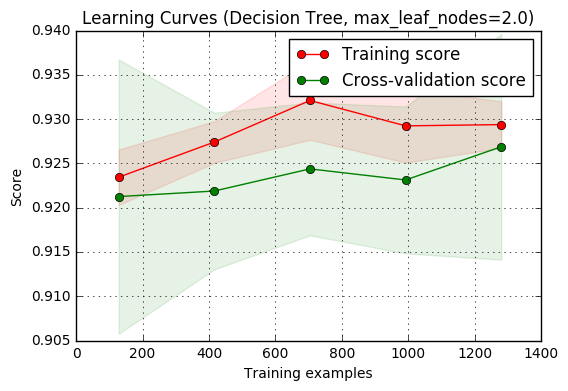

In [19]:
title = 'Learning Curves (Decision Tree, max_leaf_nodes=%.1f)' %classifier.best_estimator_.max_leaf_nodes
estimator = DecisionTreeClassifier( max_leaf_nodes=classifier.best_estimator_.max_leaf_nodes)
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()


#### Example of Underfitting 

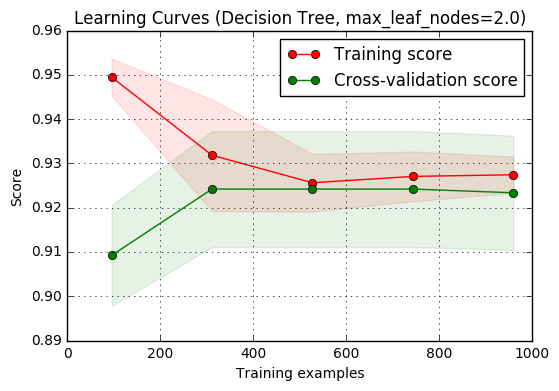

In [20]:
title = 'Learning Curves (Decision Tree, max_leaf_nodes=%.1f)' %classifier.best_estimator_.max_leaf_nodes
estimator = DecisionTreeClassifier( max_leaf_nodes=classifier.best_estimator_.max_leaf_nodes)
IND=np.random.randint(np.shape(X_train)[0], size=1200)
plot_learning_curve(estimator, title, X_train[IND], y_train[IND], cv=5)
plt.show()



### Final evaluation on the test set

In [21]:
classifier.score(X_test, y_test)


0.93000000000000005

# Create a visualization of our decision tree

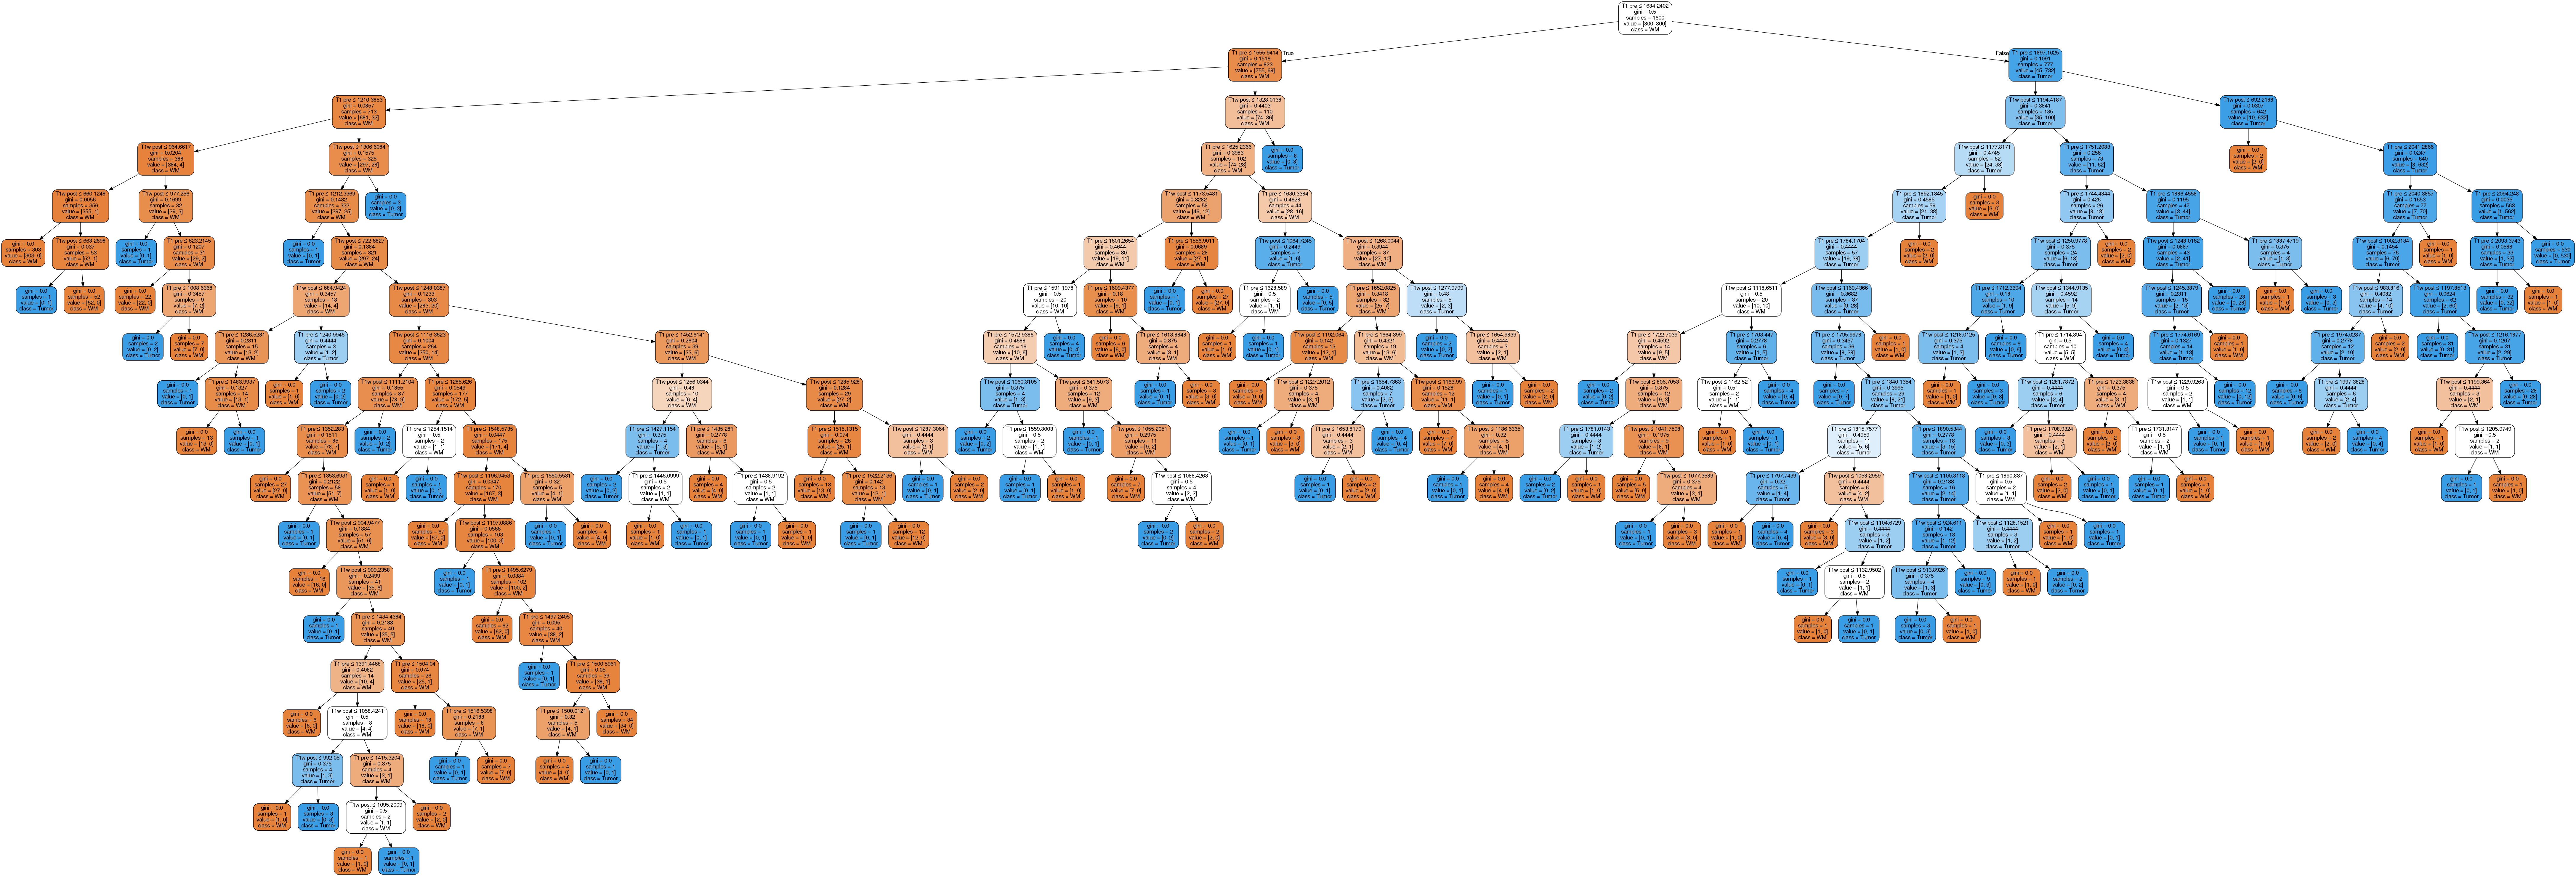

In [22]:
from IPython.display import Image  
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=['T1 pre', 'T1w post'],  
                         class_names=['WM', 'Tumor'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  